## A3. Community detection

### INFO

#### TASKS: 


[1] Apply at least three different community detection algorithms for the attached undirected networks

[2] At least one of the algorithms must be based on the optimization of modularity

[3] You must use at least two different programs

#### Comparissons: 
[1] Partition of reference, obtained from external information. In these cases, you have to compare your partitions with them, using at least the following standard measures: Jaccard Index, Normalized Mutual Information (arithmetic normalization), and Normalized Variation of Information.

#### DELIVERY
[1] a plot with color-coded communities

[2] Brief description of the algorithms and the programs used.

[3] Selected parameters for each algorithm and/or network, and the scripts used (if any).

[4] A table with the comparison measures between your partitions and the reference ones, grouped by network.

[5] A table with the modularity values of all the partitions (including the reference ones), grouped by network.

[6] The obtained partitions, in Pajek format (*.clu)



#### CAVEATS: 
[1] The position of the nodes must not change for all the partitions of the same network.

[2] If the network contains coordinates for the nodes (e.g. airports_UW.net), use them to establish the position of the nodes. Otherwise, use a layout algorithm to distribute the nodes in the plane trying to minimize the number of links crossings (e.g., Kamada-Kawai, ForceAtlas, etc.). Circular layouts must not be used.



## Community 

- Groups of densely connected components in various networks. 
- Most widely used algorithm Girvan-Newman algorithm

#### Techniques 
- **Agglomerative**: start only with the nodes of the original graph. Edges are added in a specific manner, if they have a weight, stronger ones are prioritized over weaker ones. 

- **Divisive**: Remove edges from the original graph iteratively. Stronger edges are removed before weaker ones. 

### Imports & Settings

In [ ]:
## get the community module 
!pip3 install -qq python-louvain

In [ ]:
## autoreload 
%load_ext autoreload
%autoreload 2

Description of Python-Louvain, it is the NetworkX's method for community detection. 
Description of NetworkX: Using different algorithms from them (3)


In [ ]:
## import libraries 
import networkx as nx 
import matplotlib.pyplot as plt
from community import community_louvain

In [289]:
## helper functions 
from src.helpers.community import CommunityAlgs
from src.helpers.config import paths_dict
from src.helpers.helpers import get_file_dict, read_clu,lol2idx,dict_vals_to_list
from src.helpers.metrics import (nmi,
                                 jaccard_index,
                                 rand_index,
                                 nvi_from_nmi)

In [290]:
## Parameters
DATA_DIR = './data/'
## get the paths of the files 
MODEL_DATA = paths_dict()
## get all the files 
DATA = get_file_dict(DATA_DIR) # Model : [net, clu]

In [291]:
## read the first graph and plot the graph and its corresponding partition 
s = DATA['TOY'][0]
net, clu = s
print(f"net: {net}")

net: ./data/toy/graph3+1+3.net


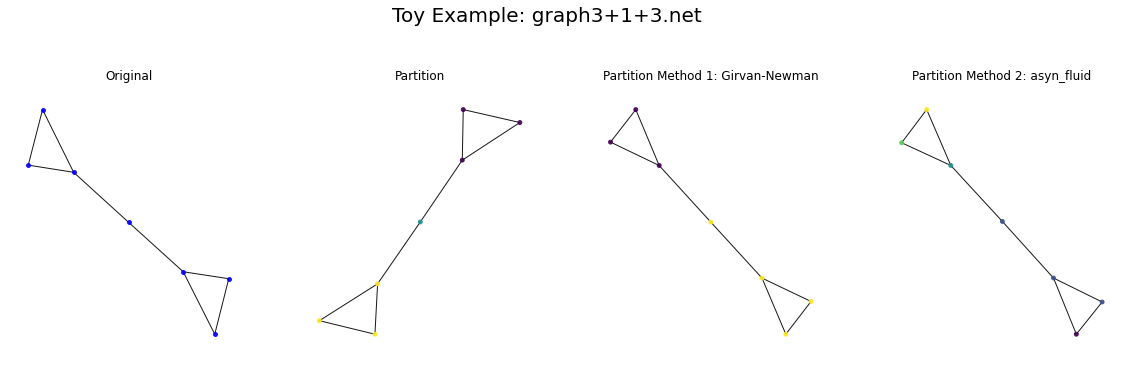

In [307]:
## load the net and clu files
g = nx.read_pajek(net)
cl = dict(read_clu(clu))

## plotting 
## set up a figure with: Original, Partition, Partition Method 1, Partition Method 2, .... Partition Method N
NUM_PARTITIONS = 4
TOTAL_FILES = sum([len(x) for _,x in DATA.items()])

## create the figure 
fig, axs = plt.subplots(1, NUM_PARTITIONS, figsize=(20,5))
axs = axs.ravel()

## plot the original 
nx.draw(g, ax=axs[0], node_color='b', edge_color='k', node_size=15, alpha=0.9)

## plot the partition
nx.draw(g, ax=axs[1], node_color=list(cl.values()), node_size=15, alpha=0.9)


## plot the partition method 1: Girvan-Newman
ca1 = CommunityAlgs(g, method='girvan_newman', verbosity=False)
ca1_comm, ca1_nc = ca1.algorithm
nx.draw(g, ax=axs[2], node_color=dict_vals_to_list(ca1_nc[0]), node_size=15, alpha=0.9)


## plot the method 2: asyn_fluid
ca2 = CommunityAlgs(g, method='asyn_fluid', verbosity=False)
ca2_comm, ca2_nc = ca2.algorithm
nx.draw(g, ax=axs[3], node_color=dict_vals_to_list(ca2_nc), node_size=15, alpha=0.9)

## set the titles 
axs[0].set_title('Original')
axs[1].set_title('Partition')
axs[2].set_title('Partition Method 1: Girvan-Newman')
axs[3].set_title('Partition Method 2: asyn_fluid')
plt.suptitle(f'Toy Example: {net.split("/")[-1]}', fontsize=20, y=1.1)
plt.show()

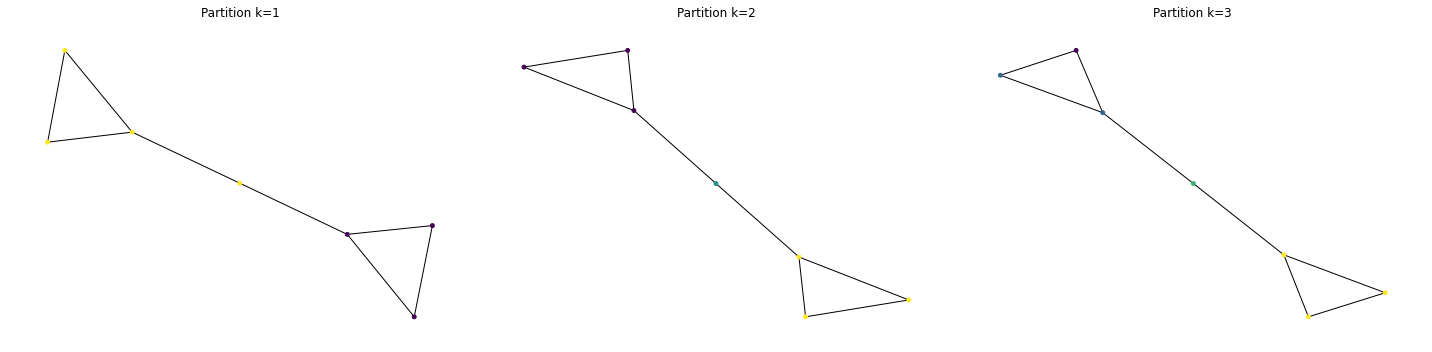

In [198]:
## This works to plot the different k-communities in a graph 
from networkx.algorithms.community.centrality import girvan_newman
mapper = {name:idx for idx, name in  enumerate(g.nodes())}
## apply the algorithm to the graph 
communities = girvan_newman(g) ## generator object
## another approach to get the community
import itertools 
## define the number of communities (tuple)
k = 3
fig, axs = plt.subplots(1, k, figsize=(20,5))
axs = axs.ravel()
for idx, comm in enumerate(itertools.islice(communities, k)):
    part = tuple(sorted(c) for c in comm)
    b = lol2idx(part) ## Converts the list of list into a dictionary of sublist-index 
    nx.draw(g, node_color=list(b.values()), node_size=15, ax=axs[idx])#,with_labels=True)
    axs[idx].set_title(f"Partition k={idx+1}")
plt.tight_layout()

#### Code

#### Community Detection Algorithm 1: Girvan-Newman algorithm

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman

- Divisive method, progressively removes edges from the original graph. 
- Removes the "most-valuable" edge. 
    - Highest betweenness centrality.
        - Highest number of shortest paths between nodes. 
        - definition is unclear but something as: 
            Number of shortest paths through V or E / Total shortest paths
- Result can be shown as a dendrogram. 

In [ ]:
## load a sample graph from the FILES
sample = FILES['TOY'][4]

In [ ]:
## apply the algorithm to the graph 
communities = girvan_newman(g) ## generator object 
## get the nodes belonging to the first community
node_groups = [com for com in next(communities)]
## loop over the nodes in the original graph 
## if they are the original assign a color to them
c1 = 'red'
c2 = 'blue'
color_map = [c2 if node in node_groups[0] else c1  for node in g.nodes()]
## draw it again 
nx.draw(g, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
import networkx.algorithms.community as nx_comm
nx_comm.modularity(g, node_groups)

In [ ]:
## another approach to get the community
import itertools 
## define the number of communities (tuple)
k = 5
for comm in itertools.islice(communities, k):
    print(tuple(sorted(c) for c in comm))

In [ ]:
## using another package 
from community import community_louvain
import community
import matplotlib.cm as cm

# compute the best partition
partition = community_louvain.best_partition(g)
print(partition)
# draw the graph
pos = nx.spring_layout(g)
# color the nodes according to their partition
cmap = cm.get_cmap('tab10', max(partition.values()) + 1)
## draw the nodes
nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
## draw the edges 
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()


In [ ]:
## given two sets of partitions or communities, calculate the metrics

## community 1 
l1 = sorted(partition.values(),reverse=False)
## community 2 
l2 = [1,1,1,1,2,2,2,2]
## normalized mutual information
_nmi = nmi(l1,l2)
## jaccard index 
jac_idx = jaccard_index(l1,l2)
## randindex 
rand_id = rand_index(l1,l2)
## nvi = normalized variation of information
_nvi = nvi_from_nmi(l1,l2,len(l1))

## feedback 
print(f"NMI: {_nmi:.2f}")
print(f"Jaccard index: {jac_idx:.2f}")
print(f"Rand index: {rand_id:.2f}")
print(f"NVI: {_nvi:.2f}")
tracker_metrics = {'nmi':_nmi,
                   'jaccard_index':jac_idx,
                   'rand_index':rand_id,
                   'nvi':_nvi}

In [ ]:
partition = community.best_partition(g)
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color=list(partition.values))
nx.draw_networkx_edges(g,pos,alpha=0.3)

#### Community Detection Algorithm 2: Fluid Communities algorithm

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman


Very nice graphs 
https://arxiv.org/pdf/1703.09307.pdf

- Based on "fluids interacting with each other" 
    - expanding and pushing each other. 

Mechanics: 
- Initial k communities initialized on a random vertex. 
- Iterate over all vertices in random order. 
- **Vertex move from one place to the other, different densities, shifts**


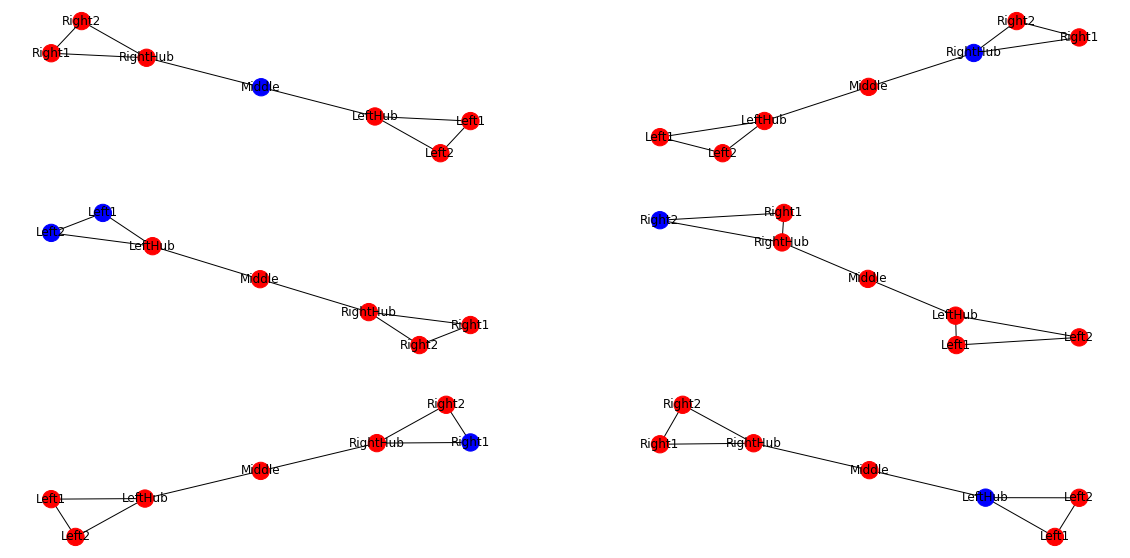

In [259]:
## import 
from networkx.algorithms.community import asyn_fluid
## set parameters 
## K is the number of communities
K = 6
## max_iter is the maximum number of iterations
max_iter = 100
## assign fluids 
fluids = asyn_fluid.asyn_fluidc(G=g, k=K, max_iter=max_iter)
## iterate over the fluids and print the communities
cmms = [fluid for fluid in fluids]



fig, axs = plt.subplots(3,2, figsize=(20,10))
axs = axs.ravel()
## assign a color to each community
for idx, i in enumerate(cmms):
    color_map = [c2 if node in cmms[idx] else c1  for node in g.nodes()]     
    ## drawing the graph
    nx.draw(g, node_color=color_map, with_labels=True, ax=axs[idx])

8

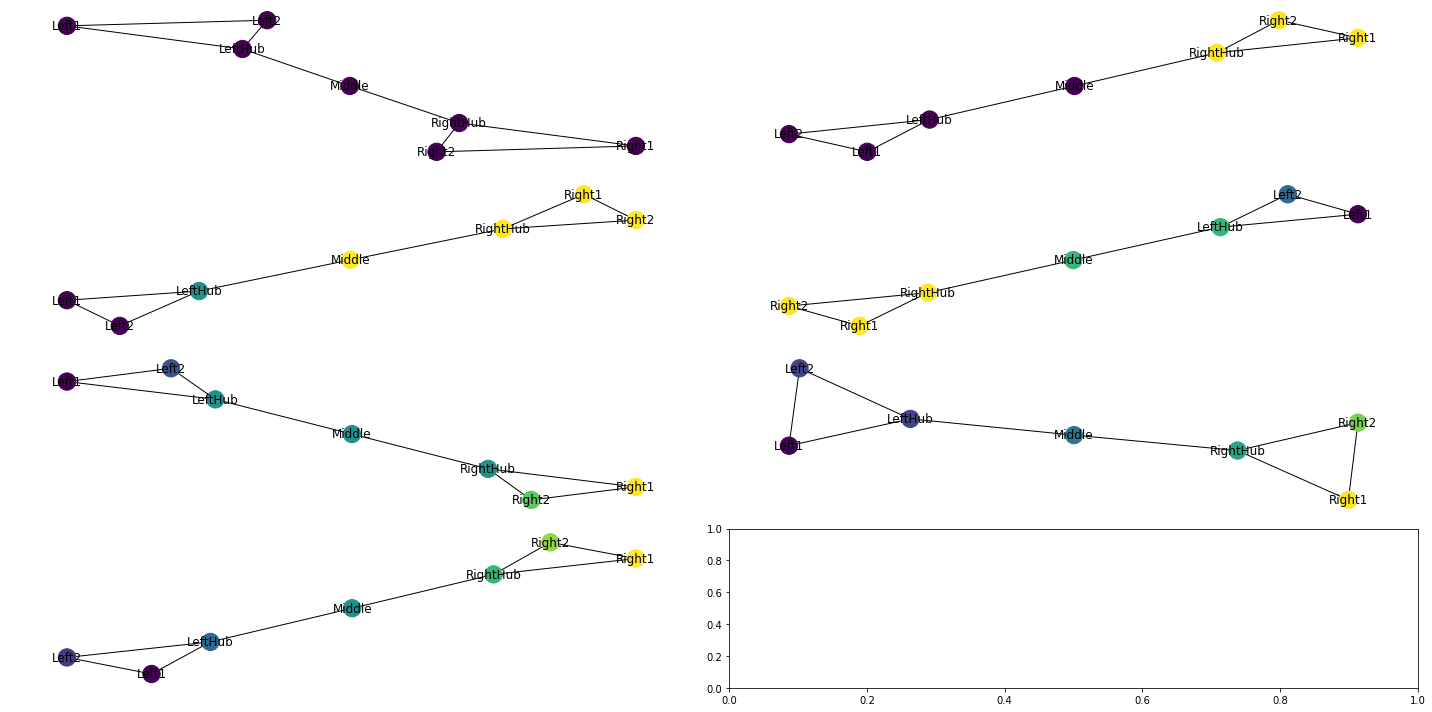

In [282]:
fig, axs = plt.subplots(4,2, figsize=(20,10))
axs = axs.ravel()
for idx, K in enumerate(range(1,len(g.edges()),1)):
    fluids = asyn_fluid.asyn_fluidc(G=g, k=K, max_iter=max_iter)
    l = [fluid for fluid in fluids]
    cy = lol2idx(l)
    cd = dict_vals_to_list(cy)
    nx.draw(g, node_color=cd, with_labels=True, ax=axs[idx])
plt.tight_layout()

5

#### Community Detection Algorithm 3: Label Propagation algorithm

#### Community Detection Algorithm 4: Label Propagation algorithm

#### Community Detection Algorithm 5: Clique Percolation algorithm

#### Community Detection Algorithm 6: Kernighan-Lin algorithm